<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.neighbors import DistanceMetric

from sklearn import cluster
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform


import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## NHL data


Now we will try DBSCAN on some [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](https://en.wikipedia.org/wiki/Ice_hockey_statistics)

### 1. a)  Load our data

In [135]:
nhl = pd.read_csv('../../../../resource-datasets/nhl_data/NHL_Data_GA.csv')

In [137]:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### 1. b) Perform any basic cleaning and/or EDA.

In [140]:
# grab the first four digits of TOI, make them an integer
nhl.TOI = [row[:4] for row in nhl.TOI]

### 2. Set up an `X` matrix to perform clustering with DBSCAN.

Let's cluster on all features EXCEPT team and rank.

Make rank be our `y` vector which we can use to do cluster validation. 

In [141]:
y, X = nhl.pop('Rank'), nhl.loc[:,'PTS':'PIM']

In [142]:
X.head()

,PTS,TOI,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,121,2001,115,73,3.45,2.19,61.2,1112,1047,33.3,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,117,2056,94,72,2.74,2.10,56.6,1143,1053,33.4,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,113,1929,90,68,2.80,2.11,57.0,1065,1039,33.1,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,112,2020,104,83,3.09,2.46,55.6,1186,868,35.2,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,111,2052,86,74,2.51,2.16,53.8,1078,1115,31.5,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for example, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

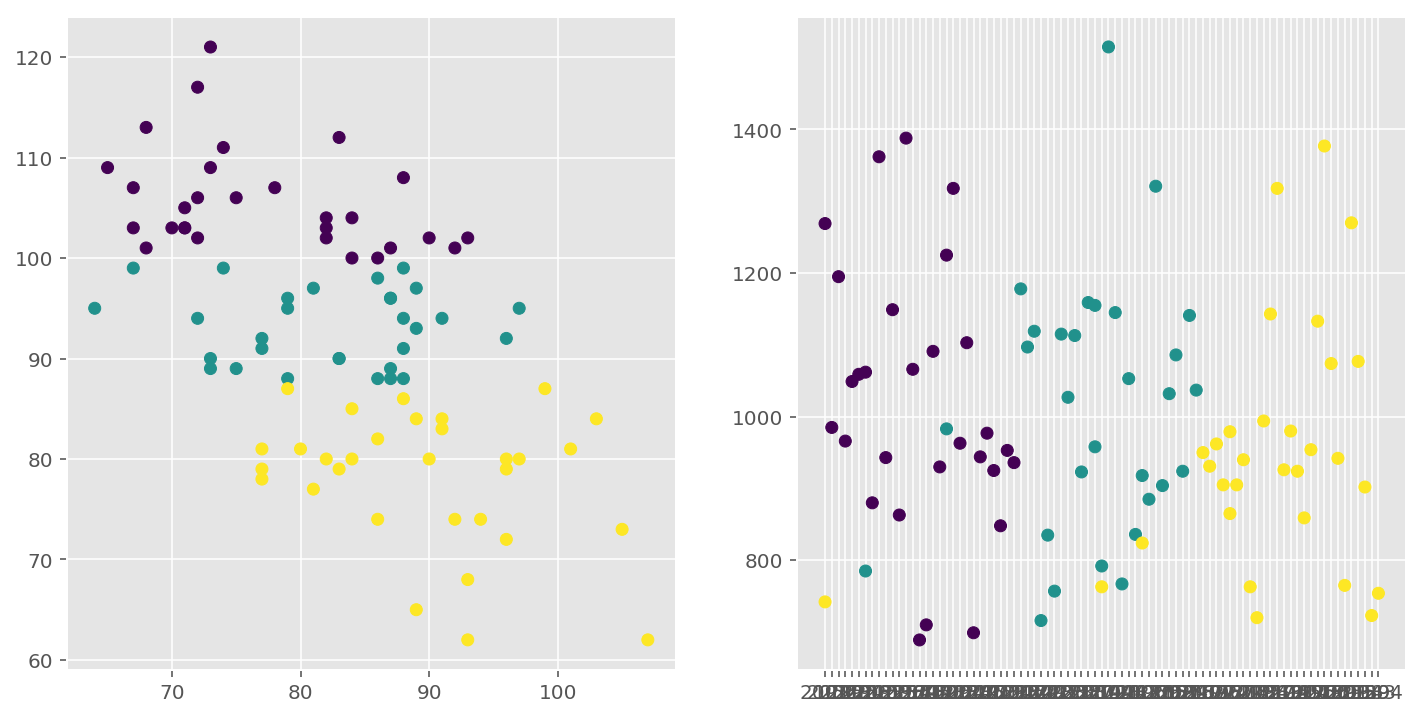

In [143]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].scatter(X.GA, X.PTS, c=y)
ax[1].scatter(X.TOI, X.PIM, c=y);

### 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

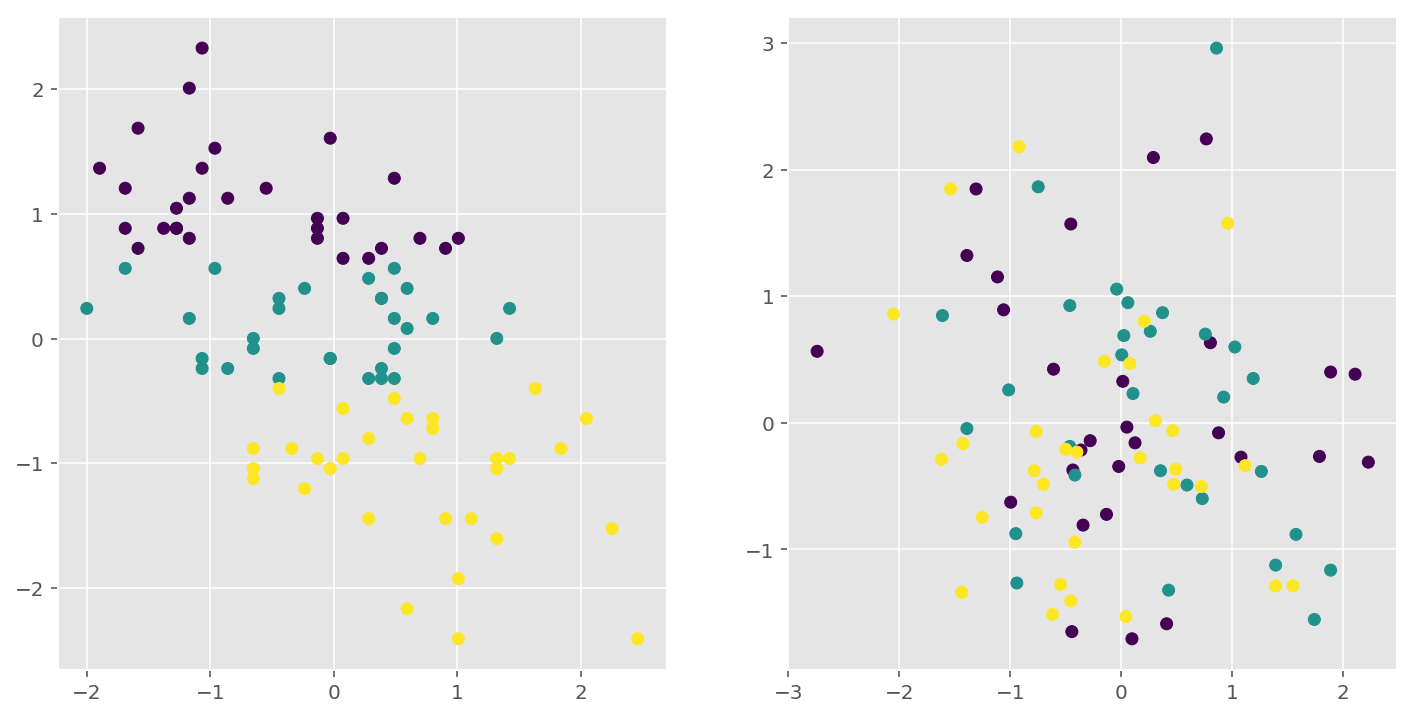

In [144]:
scaler = StandardScaler()
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].scatter(Xs.GA, Xs.PTS, c=y)
ax[1].scatter(Xs.TOI, Xs.PIM, c=y);

### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [145]:
dbscan = DBSCAN(eps=3.5, min_samples=10)
clusters = dbscan.fit(Xs)
dbscan.labels_

array([-1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1,
        0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1,
        0,  0,  0, -1, -1])

### 6. Check out the assigned cluster labels

Use the `.labels_` command on our DBSCAN class.
How many clusters do we have?

### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [146]:
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score

for i in range(30,50):
    for j in range(30,50):
        dbscan = DBSCAN(eps=i/10, min_samples=j/10)
        clusters = dbscan.fit(Xs)
        print('Eps={}'.format(i/10),'Samples={}'.format(j/10))
        print('Silhouette:', silhouette_score(Xs,dbscan.labels_))
        print('H,C,V:', homogeneity_completeness_v_measure(y, dbscan.labels_))

# Best was... 

# Eps=3.2 Samples=3.0
# Silhouette: -0.03579847962224032
# H,C,V: (0.2342058650155586, 0.1582784364545359, 0.18889794055097642)

Eps=3.0 Samples=3.0
Silhouette: -0.07180063048600896
H,C,V: (0.20543257374810533, 0.13998437522526883, 0.166508045262505)
Eps=3.0 Samples=3.1
Silhouette: -0.13816338364222422
H,C,V: (0.0927148753219486, 0.10614896555612155, 0.0989781557434951)
Eps=3.0 Samples=3.2
Silhouette: -0.13816338364222422
H,C,V: (0.0927148753219486, 0.10614896555612155, 0.0989781557434951)
Eps=3.0 Samples=3.3
Silhouette: -0.13816338364222422
H,C,V: (0.0927148753219486, 0.10614896555612155, 0.0989781557434951)
Eps=3.0 Samples=3.4
Silhouette: -0.13816338364222422
H,C,V: (0.0927148753219486, 0.10614896555612155, 0.0989781557434951)
Eps=3.0 Samples=3.5
Silhouette: -0.13816338364222422
H,C,V: (0.0927148753219486, 0.10614896555612155, 0.0989781557434951)
Eps=3.0 Samples=3.6
Silhouette: -0.13816338364222422
H,C,V: (0.0927148753219486, 0.10614896555612155, 0.0989781557434951)
Eps=3.0 Samples=3.7
Silhouette: -0.13816338364222422
H,C,V: (0.0927148753219486, 0.10614896555612155, 0.0989781557434951)
Eps=3.0 Samples=3.8
Silh

Eps=3.3 Samples=4.3
Silhouette: -0.05441849018841242
H,C,V: (0.13865658929716368, 0.13125393164061558, 0.1348537465668201)
Eps=3.3 Samples=4.4
Silhouette: -0.05441849018841242
H,C,V: (0.13865658929716368, 0.13125393164061558, 0.1348537465668201)
Eps=3.3 Samples=4.5
Silhouette: -0.05441849018841242
H,C,V: (0.13865658929716368, 0.13125393164061558, 0.1348537465668201)
Eps=3.3 Samples=4.6
Silhouette: -0.05441849018841242
H,C,V: (0.13865658929716368, 0.13125393164061558, 0.1348537465668201)
Eps=3.3 Samples=4.7
Silhouette: -0.05441849018841242
H,C,V: (0.13865658929716368, 0.13125393164061558, 0.1348537465668201)
Eps=3.3 Samples=4.8
Silhouette: -0.05441849018841242
H,C,V: (0.13865658929716368, 0.13125393164061558, 0.1348537465668201)
Eps=3.3 Samples=4.9
Silhouette: -0.05441849018841242
H,C,V: (0.13865658929716368, 0.13125393164061558, 0.1348537465668201)
Eps=3.4 Samples=3.0
Silhouette: -0.04709217669150453
H,C,V: (0.08158600225068753, 0.10980723308452192, 0.09361598543318518)
Eps=3.4 Samples

H,C,V: (0.05747211311942357, 0.10499522525436505, 0.07428320699062746)
Eps=3.7 Samples=4.8
Silhouette: 0.1479489340818389
H,C,V: (0.05747211311942357, 0.10499522525436505, 0.07428320699062746)
Eps=3.7 Samples=4.9
Silhouette: 0.1479489340818389
H,C,V: (0.05747211311942357, 0.10499522525436505, 0.07428320699062746)
Eps=3.8 Samples=3.0
Silhouette: 0.10568955039830628
H,C,V: (0.024042753326986344, 0.051466300676333274, 0.03277465432845157)
Eps=3.8 Samples=3.1
Silhouette: 0.187815082141244
H,C,V: (0.018171605020098843, 0.04429324299609627, 0.025770632358719313)
Eps=3.8 Samples=3.2
Silhouette: 0.187815082141244
H,C,V: (0.018171605020098843, 0.04429324299609627, 0.025770632358719313)
Eps=3.8 Samples=3.3
Silhouette: 0.187815082141244
H,C,V: (0.018171605020098843, 0.04429324299609627, 0.025770632358719313)
Eps=3.8 Samples=3.4
Silhouette: 0.187815082141244
H,C,V: (0.018171605020098843, 0.04429324299609627, 0.025770632358719313)
Eps=3.8 Samples=3.5
Silhouette: 0.187815082141244
H,C,V: (0.01817160

H,C,V: (0.006054099691528437, 0.027145980141287163, 0.009900245470925792)
Eps=4.1 Samples=4.3
Silhouette: 0.1993628993561311
H,C,V: (0.006054099691528437, 0.027145980141287163, 0.009900245470925792)
Eps=4.1 Samples=4.4
Silhouette: 0.1993628993561311
H,C,V: (0.006054099691528437, 0.027145980141287163, 0.009900245470925792)
Eps=4.1 Samples=4.5
Silhouette: 0.1993628993561311
H,C,V: (0.006054099691528437, 0.027145980141287163, 0.009900245470925792)
Eps=4.1 Samples=4.6
Silhouette: 0.1993628993561311
H,C,V: (0.006054099691528437, 0.027145980141287163, 0.009900245470925792)
Eps=4.1 Samples=4.7
Silhouette: 0.1993628993561311
H,C,V: (0.006054099691528437, 0.027145980141287163, 0.009900245470925792)
Eps=4.1 Samples=4.8
Silhouette: 0.1993628993561311
H,C,V: (0.006054099691528437, 0.027145980141287163, 0.009900245470925792)
Eps=4.1 Samples=4.9
Silhouette: 0.1993628993561311
H,C,V: (0.006054099691528437, 0.027145980141287163, 0.009900245470925792)
Eps=4.2 Samples=3.0
Silhouette: 0.1872589324233105


Silhouette: 0.1880753275144619
H,C,V: (0.008330502883967509, 0.08585205816820951, 0.015187330014706242)
Eps=4.5 Samples=4.0
Silhouette: 0.1880753275144619
H,C,V: (0.008330502883967509, 0.08585205816820951, 0.015187330014706242)
Eps=4.5 Samples=4.1
Silhouette: 0.2528745552003532
H,C,V: (0.014747368215535333, 0.11082284782235315, 0.026030780149925783)
Eps=4.5 Samples=4.2
Silhouette: 0.2528745552003532
H,C,V: (0.014747368215535333, 0.11082284782235315, 0.026030780149925783)
Eps=4.5 Samples=4.3
Silhouette: 0.2528745552003532
H,C,V: (0.014747368215535333, 0.11082284782235315, 0.026030780149925783)
Eps=4.5 Samples=4.4
Silhouette: 0.2528745552003532
H,C,V: (0.014747368215535333, 0.11082284782235315, 0.026030780149925783)
Eps=4.5 Samples=4.5
Silhouette: 0.2528745552003532
H,C,V: (0.014747368215535333, 0.11082284782235315, 0.026030780149925783)
Eps=4.5 Samples=4.6
Silhouette: 0.2528745552003532
H,C,V: (0.014747368215535333, 0.11082284782235315, 0.026030780149925783)
Eps=4.5 Samples=4.7
Silhouet

Silhouette: 0.19922211717227975
H,C,V: (0.011577905572890186, 0.20828759003091965, 0.02193644839778183)
Eps=4.9 Samples=3.3
Silhouette: 0.19922211717227975
H,C,V: (0.011577905572890186, 0.20828759003091965, 0.02193644839778183)
Eps=4.9 Samples=3.4
Silhouette: 0.19922211717227975
H,C,V: (0.011577905572890186, 0.20828759003091965, 0.02193644839778183)
Eps=4.9 Samples=3.5
Silhouette: 0.19922211717227975
H,C,V: (0.011577905572890186, 0.20828759003091965, 0.02193644839778183)
Eps=4.9 Samples=3.6
Silhouette: 0.19922211717227975
H,C,V: (0.011577905572890186, 0.20828759003091965, 0.02193644839778183)
Eps=4.9 Samples=3.7
Silhouette: 0.19922211717227975
H,C,V: (0.011577905572890186, 0.20828759003091965, 0.02193644839778183)
Eps=4.9 Samples=3.8
Silhouette: 0.19922211717227975
H,C,V: (0.011577905572890186, 0.20828759003091965, 0.02193644839778183)
Eps=4.9 Samples=3.9
Silhouette: 0.19922211717227975
H,C,V: (0.011577905572890186, 0.20828759003091965, 0.02193644839778183)
Eps=4.9 Samples=4.0
Silhouet

In [147]:
dbscan = DBSCAN(eps=3.2, min_samples=3)
clusters = dbscan.fit(Xs)
print('Silhouette:', silhouette_score(Xs,dbscan.labels_))
print('H,C,V:', homogeneity_completeness_v_measure(y, dbscan.labels_))

Silhouette: -0.03579847962224032
H,C,V: (0.2342058650155586, 0.1582784364545359, 0.18889794055097642)


In [148]:
pd.Series(dbscan.labels_).value_counts()

 1    33
-1    29
 4     8
 0     7
 5     4
 6     3
 3     3
 2     3
dtype: int64

### 8. Plot the clusters

Create a scatter plot with colors according to the cluster labels.
You can choose any two variables for the axes.
How do you judge the fit?

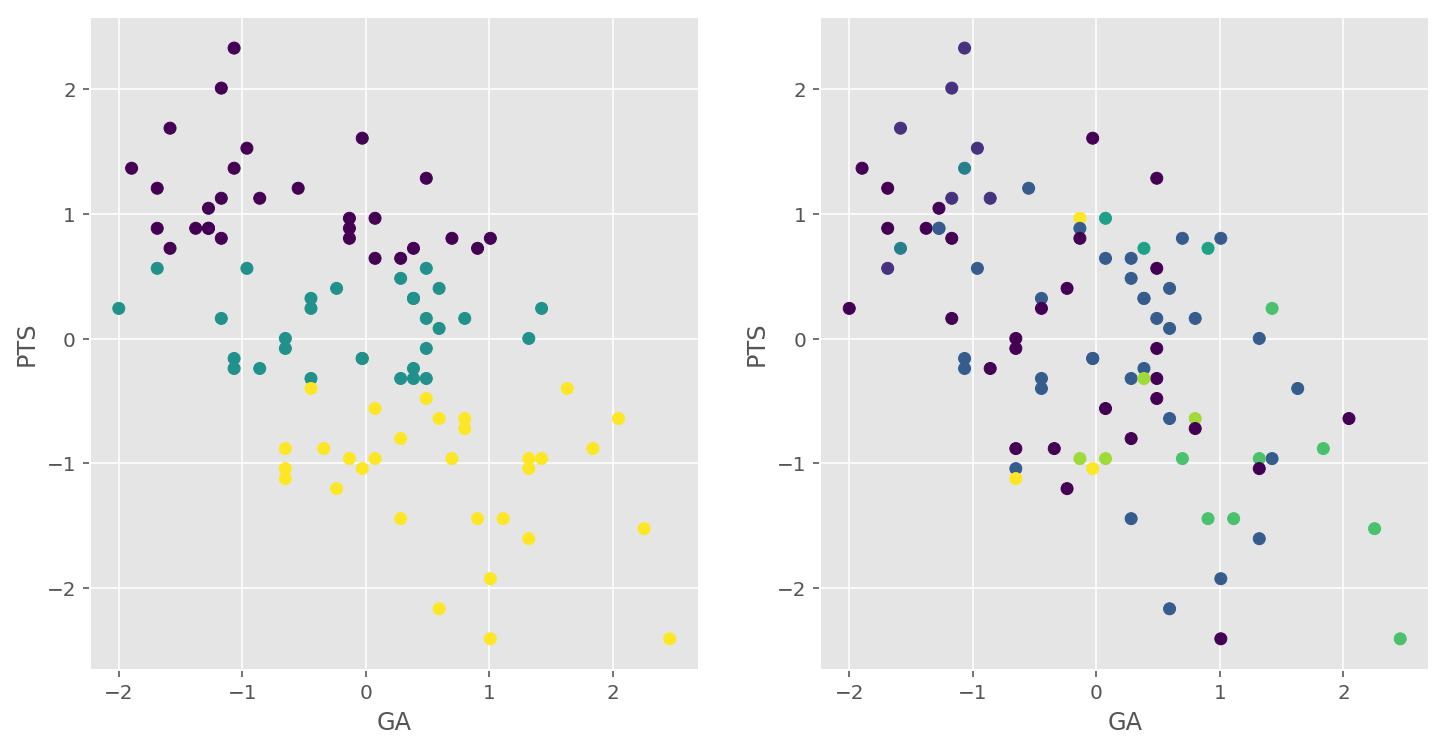

In [149]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].scatter(Xs.GA, Xs.PTS, c=y)
ax[0].set_xlabel('GA')
ax[0].set_ylabel('PTS');
ax[1].scatter(Xs.GA, Xs.PTS, c=dbscan.labels_)
ax[1].set_xlabel('GA')
ax[1].set_ylabel('PTS');

### 9. How does the result look like if you choose only the first few principal components?

In [150]:
from sklearn.decomposition import PCA

In [151]:
pca = PCA()
pca.fit(Xs)
col = ['PC{}'.format(i) for i in range(1,pca.n_components_+1)]
nhl_pca = pd.DataFrame(pca.fit_transform(Xs), columns=col)

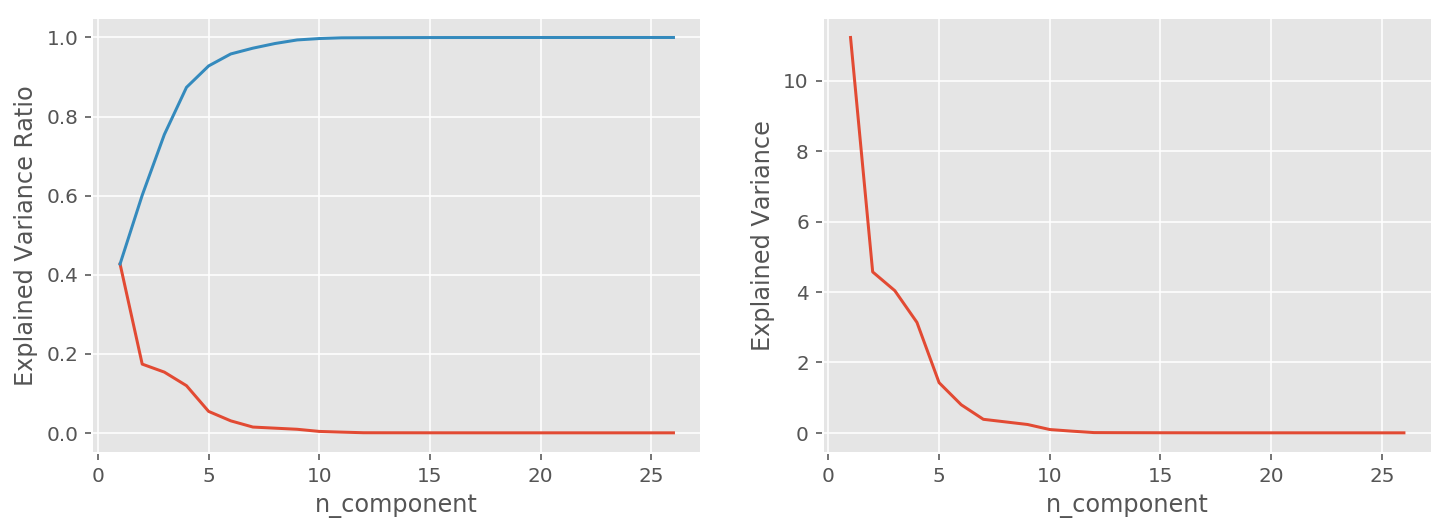

In [152]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
ax[0].plot(range(1,pca.n_components_+1),pca.explained_variance_ratio_);
ax[0].plot(range(1,pca.n_components_+1),np.cumsum(pca.explained_variance_ratio_))
ax[0].set_xlabel('n_component')
ax[0].set_ylabel('Explained Variance Ratio')
ax[1].plot(range(1,pca.n_components_+1),pca.explained_variance_);
ax[1].set_xlabel('n_component')
ax[1].set_ylabel('Explained Variance');

In [156]:
dbscan = DBSCAN(eps=3.2, min_samples=3)
dbscan.fit(nhl_pca.loc[:,'PC1':'PC6'])
print('Silhouette:', silhouette_score(nhl_pca.loc[:,'PC1':'PC6'],dbscan.labels_))
print('H,C,V:', homogeneity_completeness_v_measure(y, dbscan.labels_))

Silhouette: 0.044780092012793996
H,C,V: (0.04377020313292524, 0.07707996476960623, 0.055834522599346986)


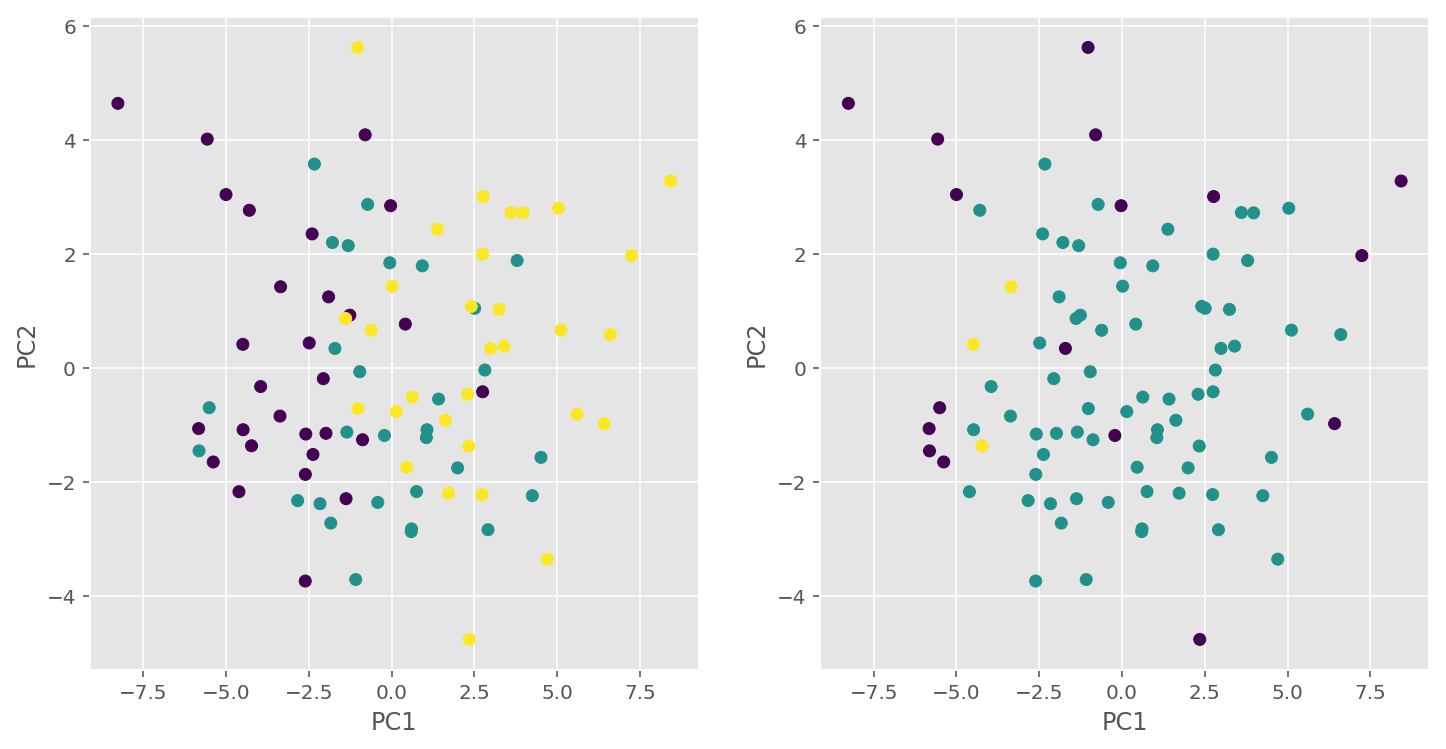

In [166]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].scatter(nhl_pca.PC1, nhl_pca.PC2, c=y)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2');
ax[1].scatter(nhl_pca.PC1, nhl_pca.PC2, c=dbscan.labels_)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2');

## Bonus:

### Try k-means and hierarchical clustering on the given dataset. Which differences do you observe? Which algorithm do you find most suitable in each case? 

In [158]:
from sklearn.cluster import KMeans, AgglomerativeClustering

KMeans silhouette: 0.17069215032185767
KMeans H.C.V: (0.2424794342035413, 0.24336237411924982, 0.24292010186023352)
AggCl silhouette: 0.13631050563415384
AggCl H.C.V: (0.16982305537806863, 0.17884931149780764, 0.17421934983241166)


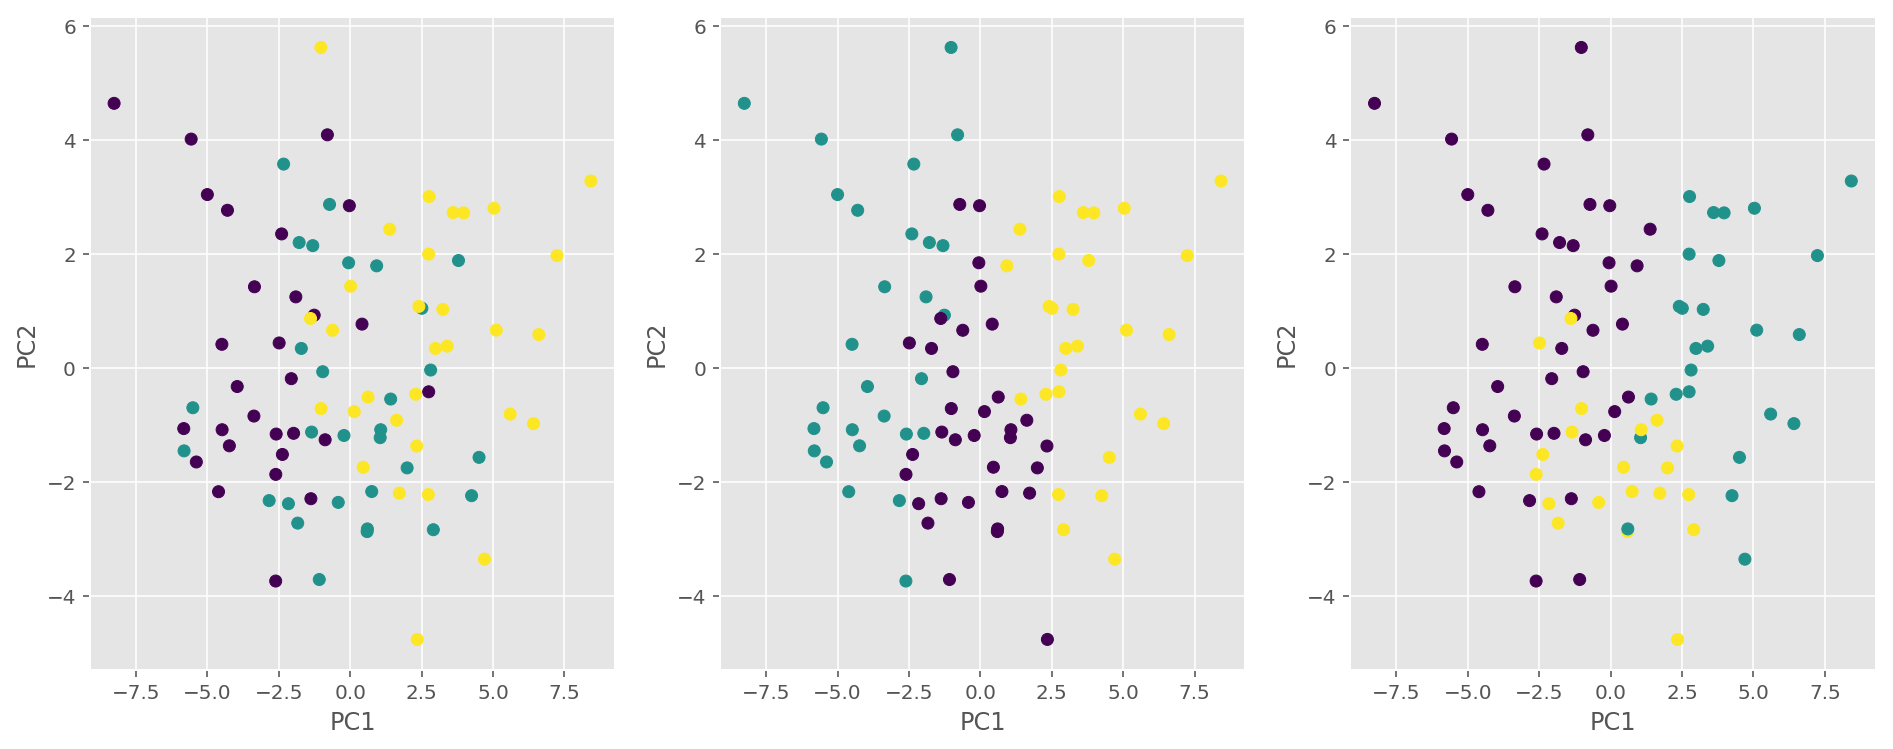

In [170]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(nhl_pca.loc[:,'PC1':'PC6'])
print('KMeans silhouette:', silhouette_score(nhl_pca.loc[:,'PC1':'PC6'], kmeans.labels_))
print('KMeans H.C.V:', homogeneity_completeness_v_measure(y, kmeans.labels_))
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(nhl_pca.loc[:,'PC1':'PC6'])
print('AggCl silhouette:', silhouette_score(nhl_pca.loc[:,'PC1':'PC6'], agg.labels_))
print('AggCl H.C.V:', homogeneity_completeness_v_measure(y, agg.labels_))

fig, ax = plt.subplots(ncols=3, figsize=(16,6))
ax[0].scatter(nhl_pca.PC1, nhl_pca.PC2, c=y)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2');
ax[1].scatter(nhl_pca.PC1, nhl_pca.PC2, c=kmeans.labels_)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2');
ax[2].scatter(nhl_pca.PC1, nhl_pca.PC2, c=agg.labels_)
ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2');

In [169]:
# as you can see even the HCV for the true labels wouldn't have been good, so that clustering's HCV has an
# upper limit. You would have to use accuracy score to see if clustering was successful not HCV.